# Learning Model (SVD)
Now that we've implemented naive user-based CF, we'll implement a more advanced model - the SVD model.

INSERT DESCRIPTION HERE

One disadvantage of the SVD model is that it can't generalize to unseen items - predictions rely on item and user factors which are learned during model training. When training our model, 

In [1]:
%%capture
import sys
import os

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
# import packages
from utils.imports import *
# import SVD model
from models.SVD import SVD

In [2]:
# import pandas dataframes
with open("../data/dataframes.pkl", "rb") as f:
    data = pickle.load(f)

train = data["train"]
validation = data["validation"]
baseline = data["baseline"]

# load sparse matrix
ui_csr = load_npz("../data/ui_csr.npz")

# load encodings
with open("../artifacts/user_encoder.pkl", "rb") as f:
    user_encoder = pickle.load(f)
with open("../artifacts/item_encoder.pkl", "rb") as f:
    item_encoder = pickle.load(f)
with open("../artifacts/user_map.pkl", "rb") as f:
    user_map = pickle.load(f)
with open("../artifacts/item_map.pkl", "rb") as f:
    item_map = pickle.load(f)

In [ ]:
%%capture
# this grid search takes a long time to run so it's quoted out


"""k_grid = np.array([10,25,50,75]) # set k grid
reg_grid = np.array([0.001, 0.02, 0.1]) # set reg grid
grid = itertools.product(k_grid, reg_grid)
models = []
# dataframe for grid search
grid_search = pd.DataFrame(columns=('reg', 'k', 'RMSE', 'coverage', 'hit_rate'))
for k, reg in grid:
    # fit model with grid params
    model = SVD(k=k, reg=reg)
    model.fit(ui_csr, validation, verbose=False)
    #evaluate
    N_1, N_2 = 100, 10
    hit_rate = model.hit_rate_at_N(validation, N_1) # get hit rate @ top 100 beers
    coverage = model.top_N_coverage(N_2) # get training set item catalog coverage @ top 10 beers
    # add results to dataframe
    grid_search.loc[len(grid_search)]= (reg, k, model.RMSE_clipped, model.top_N_coverage(), model.hit_rate_at_N(validation))
    # save model
    models.append(model)"""

Stopped after 11 iterations
Final RMSE is: 0.6970803696464634 (clipped prediction RMSE is 0.7115665293817667) 
Params: 10 latent factors, 0.005 learning rate, 0.001 reg. parameter
Stopped after 11 iterations
Final RMSE is: 0.6966092906463112 (clipped prediction RMSE is 0.7115665293817667) 
Params: 10 latent factors, 0.005 learning rate, 0.02 reg. parameter
Stopped after 11 iterations
Final RMSE is: 0.6964254433195153 (clipped prediction RMSE is 0.7119672648750294) 
Params: 10 latent factors, 0.005 learning rate, 0.1 reg. parameter
Stopped after 14 iterations
Final RMSE is: 0.695346195478145 (clipped prediction RMSE is 0.7090720385523095) 
Params: 25 latent factors, 0.005 learning rate, 0.001 reg. parameter
Stopped after 15 iterations
Final RMSE is: 0.6941537976554261 (clipped prediction RMSE is 0.7089745146322317) 
Params: 25 latent factors, 0.005 learning rate, 0.02 reg. parameter
Stopped after 14 iterations
Final RMSE is: 0.6942797319143535 (clipped prediction RMSE is 0.7091086065644

In [11]:
# load results of grid search
with open("../artifacts/models.pkl", "rb") as f:
    models = pickle.load(f)
with open("../data/grid_search.pkl", "rb") as f:
    grid_search = pickle.load(f)

In [48]:
def plot_heatmap(values):
    pivot = grid_search.copy().pivot(index="k", columns="reg", values=values)
    sb.heatmap(pivot, annot=True, fmt=".4f", cmap='rocket').invert_yaxis()

In [12]:
grid_search.head()

,reg,k,RMSE,coverage,hit_rate
0,0.001,10.0,0.711567,0.1680,0.007053
1,0.020,10.0,0.711567,0.1912,0.003319
2,0.100,10.0,0.711967,0.1754,0.001245
3,0.001,25.0,0.709072,0.3538,0.011962
4,0.020,25.0,0.708975,0.4916,0.004218


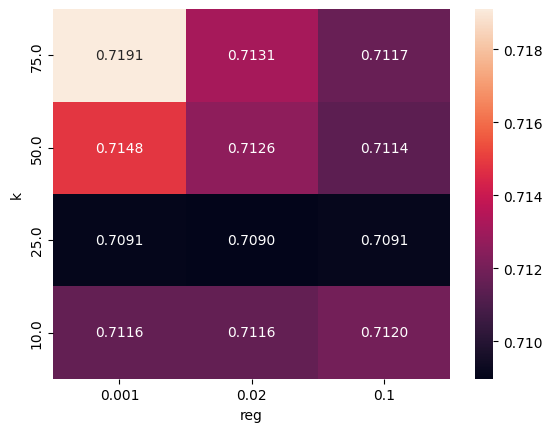

In [49]:
# plot RMSE values
# these values are the clipped prediction RMSE values, not the SGD learning values
plot_heatmap("RMSE")

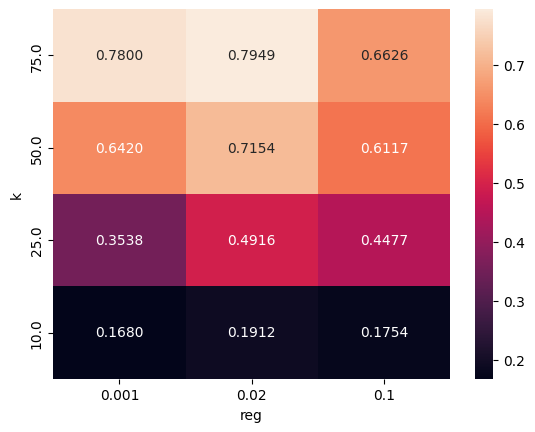

In [50]:
# plot coverage values
plot_heatmap("coverage")

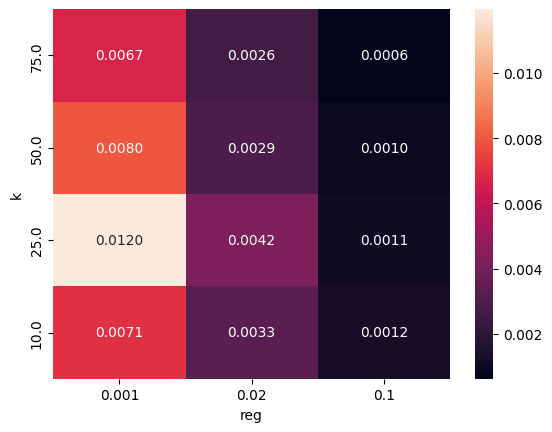

In [51]:
# plot hit-rate values
plot_heatmap("hit_rate")